In [2]:
#import pandas 
import pandas as pd 

In [12]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
#load dataset 
diab=pd.read_csv("diabetes.csv",skiprows=1,header=None, names=col_names)

In [13]:
diab.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
#split dataset in features and target variable 
feature_cols=['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X=diab[feature_cols] #Features
y=diab.label #Target #( 0=no diabet --1=diabet)#

In [19]:
#Splitting Data : To understand model performance, dividing the dataset into a training set and a test set is a good strategy.
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=16)


In [27]:
#Model Devlopment and Prediction 
from sklearn.linear_model import LogisticRegression

#instantiate the model:
lgr=LogisticRegression(random_state=16, max_iter=1000)
#fit the model with data
lgr.fit(X_train,y_train)
y_pred=lgr.predict(X_test)

In [29]:
#Model Evaluation using Confusion Matrix A confusion matrix is a table that is used to evaluate
#the performance of a classification model. 
#You can also visualize the performance of an algorithm. 
#The fundamental of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

#import the metrics class
from sklearn import metrics

cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[116,   9],
       [ 25,  42]])

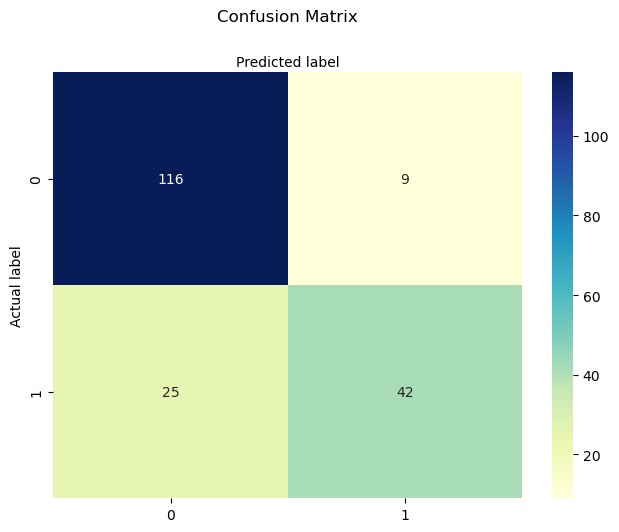

In [33]:
#Visualizing Confusion Matrix using Heatmap 

#import required modules:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

class_names=[0,1] #name of classes 
fig,ax=plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)


#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


plt.Text(0.5,257.44,'Predicted label');

In [34]:
#Confusion Matrix Evaluation Metrics 
#Let's evaluate the model using classification_report for accuracy, precision, and recall.

from sklearn.metrics import classification_report
target_names=['without diabetes','with diabetes']
print(classification_report(y_test,y_pred,target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



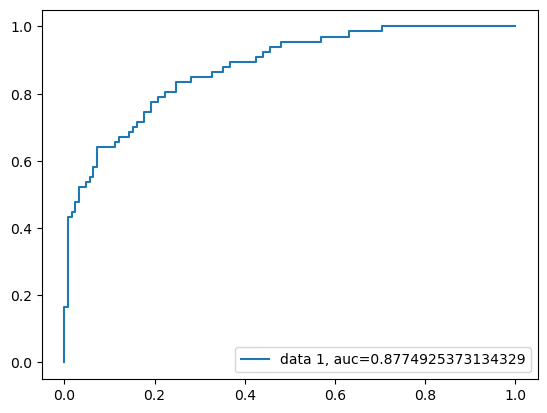

In [35]:
#ROC curve (Receiver Operating Characteristic )
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()